## Devoir PHYS-F-302, année académique 2019-2020

Soit l'équation différentielle linéaire à coefficients constants:

\begin{align}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0 \hspace{6cm} (1)
\end{align}

où $f$ est une fonction de la variable $x \in [0\ 1]$. Par ailleurs, on a les conditions aux bords suivantes:

\begin{align} f(0)=a, f'(0)=b, f(1)=c, f'(1)=d \hspace{3cm} (2)\end{align}


### Question 1 (2 points)
Quelle est la solution générale de l'équation (1)?

### Question 2 (3 points)
Ecrire un code en python qui permet d'évaluer les constantes d'intégration de la solution générale en termes des conditions aux bords (2). Pour cette question vous pouvez vous servir de n'importe quelle routine fournie par numpy.

### Question 3 (2 points)
Que vaut la solution de l'équation (1) pour $a=0, b=0, c=1, d=-1$. Représentez cette fonction sur un graphique.

### Question 4 (6 points)
Résoudre l'équation (1) avec la méthode Gauss-Seidel vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).
### Question 5 (7 points)
Résoudre l'équation (1) avec la méthode du gradient conjugué vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

## Consignes:
- Pour les questions 4 et 5 prendre $nx=101$ pour discrétiser l'interval $x\in [0\ 1]$.
- Faites converger les méthodes itératives jusqu'à ce que la différence en norme L2 de deux itérations successives soit $<10^{-8}$.

In [1]:
def L2_rel_error(p, pn):
    ''' Compute the relative L2 norm of the difference
    Parameters:
    ----------
    p : array of float 
        array 1
    pn: array of float
        array 2
    Returns :
    --------
    Relative L2 norm of the difference
    '''
    return np.sqrt(np.sum((p - pn)**2)/np.sum(pn**2))

## Solutions :

On commence par importer les modules pertinents.

In [2]:
#Importons numpy, numba et matplotlib
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import numba
from numba import jit
# On choisis la police et la taille que l'on souhaite dans nos graphiques
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

### 1) 

Le polynôme caractéristique de l'équation (1) est :

\begin{equation}
p_{caract}(m)=m^4-5m^2+4
\end{equation}

En posant $m^2=n$, on trouve:

\begin{equation}
n^2-5n+4=0\\
\Leftrightarrow n\in\{1,4\}\\
\Rightarrow m \in \{-2,-1,1,2\}
\end{equation}

Remarque : On pourrait aussi chercher une solution de la forme $e^{\lambda\cdot x}$. On obtient alors :

\begin{equation}
e^{\lambda\cdot x}\cdot p_{caract}(\lambda)=0
\end{equation}

ce qui justifie l'étude des racines du polynôme caractéristique, 

L'ensemble des solutions de (1) est donc donné par :

\begin{equation}
f(x) = C_1e^{-2x} + C_2e^{-x} + C_3e^{x} + C_4e^{2x} \hspace{4cm} (3)
\end{equation}


Où $C_1$,$C_2$,$C_3$,$C_4$ sont des constantes réelles.

### 2)

Pour déterminer ces 4 constantes réelles, on a besoins de 4 conditions au bord.

\begin{align}
\left\{
    \begin{array}{ll} 
        f(0)&=a\\
        f'(0)&=b\\
        f(1)&=c\\
        f'(1)&=d
    \end{array}
\right.
\end{align}

\begin{align}
\Rightarrow
\left\{
    \begin{array}{ll} 
        C_1+C_2+C_3+C_4&=a\\
        -2C_1-C_2+C_3+2C_4&=b\\
        C_1e^{-2}+C_2e^{-1}+C_3e+C_4e^{2}&=c\\
        -2C_1e^{-2}-C_2e^{-1}+C_3e+2C_4e^{2}&=d
    \end{array}
\right.
\end{align}

Evaluer les constantes d'intégration $C_1$,$C_2$,$C_3$ et $C_4$ revient donc à résoudre ce système de quatre équation à quatre inconnues. Ecrivons une fonction nous donnant les quatre constantes d'intégration lorsqu'on lui fournit a,b,c et d.

In [3]:
def constants_of_int(a,b,c,d):
    """
    Calcule les constantes d'intégration de f(x) en fonction des valeurs de a,b,c et d.
    
    Paramètres :
    ----------
    a,b,c,d :   float
                Conditions de bords du système : f(0)=a, f'(0)=b, f(1)=c, f'(1)=d
                
    Retourne :
    --------
    C_1, C_2, C_3, C_4 :    float
                            Constantes d'intégration de f(x)
    
    """
    #On définit "system", la matrice 4 par 4 correspondant au système d'équation
    system = np.array([[1,1,1,1],[-2,-1,1,2],[np.exp(-2),np.exp(-1),np.exp(1),np.exp(2)],
                [-2*np.exp(-2),-np.exp(-1),np.exp(1),2*np.exp(2)]])
    variables = np.array([a,b,c,d])
    #On utilise la fonction "solve" de numpy qui résout les systèmes d'équations linéaires
    constants = np.linalg.solve(system, variables)
    return constants[0], constants[1], constants[2], constants[3]

### 3)
On peut appliquer la fonction constant_of_int aux conditions de bord a=b=0, c=-d=1. C'est-à-dire :

\begin{equation}
\left\{
    \begin{array}{ll} 
        f(0)&=0\\
        f'(0)&=0\\
        f(1)&=1\\
        f'(1)&=-1
    \end{array}
\right. \hspace{6cm} (4)
\end{equation}

In [4]:
constants_of_int(0,0,1,-1)

(3.3522814379441543,
 -5.3373917644283235,
 2.603049541508353,
 -0.6179392150241841)

\begin{equation}
\Rightarrow
\left\{
    \begin{array}{ll} 
        C_1 = 3.3522814379441543\\
        C_2 = -5.3373917644283235\\
        C_3 = 2.603049541508353\\
        C_4 =  -0.6179392150241841
    \end{array}
\right. \hspace{4cm} (5)
\end{equation}

La solution à l'équation (1) avec les conditions au bord (4) est donc la fonction (3) avec les constantes d'intégrations (5) :

\begin{equation}
f(x) = 3.3522814379441543 \cdot e^{-2x} -5.3373917644283235\cdot e^{-x} + 2.603049541508353\cdot e^{x}  -0.6179392150241841\cdot e^{2x} \hspace{1cm} (6)
\end{equation}

Représentons cette fonction graphiquement. Pour ce faire, on discrétise l'axe x et on détermine la valeur de la fonction (6) en l'ensemble fini de points obtenus.

In [5]:
#Discrétisation de l'axe x
nx = 101  # nombre de points sur l'axe x
xmin, xmax = 0.0, 1.0  # limites du domaine
Lx = (xmax - xmin)  # longueur du domaine
dx = Lx / (nx - 1)  # espacement entre chaque point de la discrétisation

# Création de la grille 1D
x = np.linspace(xmin, xmax, num=nx)

In [6]:
def solution(a,b,c,d,x):
    """
    Renvoie la valeur de f(x) pour chaque élément de x, étant donné les conditions au bord (a,b,c,d).
    
    Paramètres :
    -----------
    a,b,c,d :   float
                Conditions au bord du système : f(0)=a, f'(0)=b, f(1)=c, f'(1)=d.
                
    x :         ndarray
                Discrétisation de l'intervalle [0,1] comme un array à une dimension de floats.
                
    Retourne :
    --------
    sol :       ndarray
                Fonction f(x) sur le domaine [0,1] comme un array (1D).
                
    """
    #On calcule les constantes d'intégrations
    c1, c2, c3, c4 = constants_of_int(a,b,c,d)
    #On calcule f(x) sur le domaine demandé
    sol = c1*np.exp(-2*x) + c2*np.exp(-x) + c3*np.exp(x) + c4*np.exp(2*x)
    return sol

Nous venons de définir la fonction (6). Pour la représenter graphiquement, nous allons définir une fonction python (qui nous sera utile plus tard) qui prend comme paramètres la fonction dont on souhaite dessiner le graphique et un array 1D donnant la discrétisation du domaine de représentation, et qui retourne le graphique demandé.

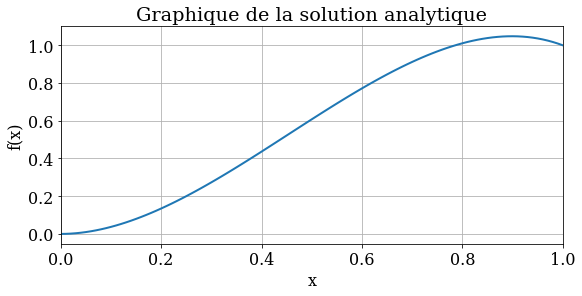

In [7]:
f_exact = solution(0,0,1,-1, x)
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title("Graphique de la solution analytique")
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.grid()   
pyplot.plot(x, f_exact, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0,Lx);

### 4)

Rappelons que la méthode de Gauss-Seidel consiste à partir d'une estimation de la solution, et à l'améliorer par des itérations actualisées, à partir des conditions aux bords. Nous avons donc besoin d'une fonction initiale pour lancer l'algorithme. Nous prendrons une fonction nulle sur l'intérieur du domaine mais obéissant néanmoins aux conditions au bord. 

Remarque : Nous verrons qu'il est en fait impossible de prendre une fonction nulle partout à l'intérieur du domaine qui satisfait les conditions au bord, en raison de la condition de Dirichlet à l'extrémité droite de l'intervalle.

Les conditions de Dirichlet peuvent être implémentées directement en donnant une valeur à f sur le bord du domaine : 

\begin{equation}
   \left\{
    \begin{array}{ll}
        f(0)=0\\
        f(1)=1
    \end{array}
\right. 
\end{equation}


Pour les conditions de Von Neumann, nous devons discrétiser les dérivées. Nous utiliserons une "forward finite difference" pour la dérivée en x=0 et une "backward finite difference" pour la dérivée en x=1. Les conditions de Von Neumann s'expriment donc :

\begin{equation}
\left\{
    \begin{array}{ll}
        \frac{3f_{nx-1}-4f_{nx-2}+f_{nx-3}}{2\Delta x} = -1\\
        \frac{-3f_0+4f_1-f_2}{2\Delta x} = 0
    \end{array}
\right.
\end{equation}

En prenant f(x)=0 sur l'intérieur du domaine partout où c'est possible, on obtient finalement la fonction initiale suivante:

\begin{equation}
\left\{
    \begin{array}{ll} 
        f_i=0 \quad \forall i \in \{0,1,...,nx-3\}\\
        f_{nx-1}=1\\
        f_{nx-2}=\frac{3+2 \Delta x}{4}
    \end{array}
\right.
\end{equation}

Implémentons à présent la fonction de départ.

In [8]:
#fonction intiale
f0 = np.zeros(nx)
f0[nx-1] = 1
f0[nx-2] = 0.25*(3+2*dx)

Visualisons ces conditions initiales sur un graphe.

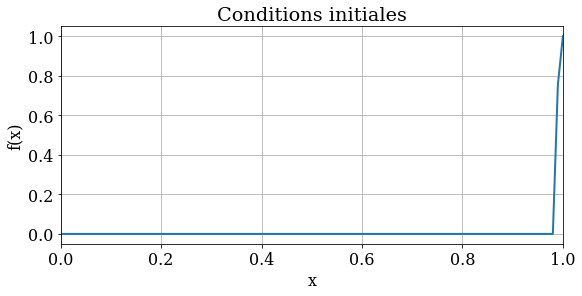

In [9]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title("Conditions initiales")
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.grid()   
pyplot.plot(x, f0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0,Lx);

Ecrivons maintenant une fonction qui résout l'équation (1) sous les conditions (4) par la méthode de Gauss-Seidel. Pour ce faire, nous devons discrétiser l'équation (1), on va utiliser une "central finite difference" au second  ordre. L'équation (1) s'écrit donc :

\begin{equation}
\frac{f_{i-2}-4f_{i-1}+6f_i-4f_{i+1}+f_{i+2}}{\Delta x^4}-5\frac{f_{i-1}-2f_i+f_{i+1}}{\Delta x^2} + 4f_i =0\\
\Rightarrow f_i^{k+1} = \frac{(4+5\Delta x^2)(f_{i+1}^k+f_{i-1}^k)-f_{i+2}^k-f_{i-2}^k}{4\Delta x^4 + 10 \Delta x^2 +6}
\end{equation}

Où i est l'indice donnant la position sur l'axe x et k est l'indice donnant l'itération. La méthode de Gauss-Siegel consiste à utiliser le fait qu'au moment de calculer $f_i$, $f_{i-1}$ et $f_{i-2}$ ont déjà été calculés. Dès lors, au lieu d'utiliser leur valeur à la $k^e$ itération pour calculer $f_i^{k+1}$, on peut utiliser leur valeur calculée à la $k+1^e$ itération.

\begin{equation}
f_i^{k+1} = \frac{(4+5\Delta x^2)(f_{i+1}^k+f_{i-1}^{k+1})-f_{i+2}^k-f_{i-2}^{k+1}}{4\Delta x^4 + 10 \Delta x^2 +6}
\end{equation}


De plus, à chaque itération, nous devons toujours respecter les conditions bord. Pour les conditions de DIrichlet, il suffit de ne pas toucher aux valeurs de $f_0$ et $f_{nx-1}$ pour ne pas les modifier. Pour les conditions de Von Neumann, on va encore utiliser une "forward finite difference" au deuxième ordre et une "backward finite difference" au second ordre.

\begin{equation}
\left\{
    \begin{array}{ll}
        \frac{3f_{nx-1}-4f_{nx-2}+f_{nx-3}}{2\Delta x} = -1\\
        \frac{-3f_0+4f_1-f_2}{2\Delta x} = 0
    \end{array}
\right.
\end{equation}

Mais, par les conditions de Dirichlet, $f_0^k=0$ et $f_{nx-1}^k=1$ pour tout k. On a donc

\begin{equation}
\left\{
    \begin{array}{ll}
        f_1^k=\frac{f_2^k}{4}\\
        f_{nx-2}^{k}=\frac{2\Delta x + 3 + f_{nx-3}^k}{4}
    \end{array}
\right.
\end{equation}

On peut maintenant définir la fonction "gauss_seidel":

In [10]:
@jit(nopython=False) #optimize code with numba
def gauss_seidel(f0, dx, maxiter=1e8, rtol=1e-8):
    """
    Résout l'équation (1) sous les conditions au bord (4)
    en utilisant la méthode de relaxation de Gauss-Seidel.
    
    Le critère d'arrêt du solveur est basée sur la norme L2 relative entre deux
    itérations consécutives.
    
    Paramètres :
    ----------
    f0 : numpy.ndarray
         Estimation initiale
    dx : float
         Espacement entre chaque point de la discrétisation;
    maxiter :   integer, optionnel
                Nombre d'itération maximum;
                par défaut : 20000
    rtol : float, optionnel
           Tolérence relative pour la convergence;
           par défaut: 1e-8.
    
    Retourne :
    --------
    f : numpy.ndarray
        La solution après relaxation comme un array 1D de floats
    ite : integer
          Nombre d'itérations ayant eu lieu
    
    conv : list
           Historique de convergence sous forme d'une liste de floats
    """
    f = f0.copy()  #On fait une copie de la solution initiale
    diff = rtol + 1.0  # différence initiale arbitrairement choisie (>rtol)
    conv=[diff] #initialisation de l'historique de convergence
    ite = 0  # index de l'itération
    while diff > rtol and ite < maxiter: #On continue tant que la différence entre chaque itération est 
                                         #supérieure à rtol; on définit un nombre max d'itérations
        fn = f.copy()# On actualise la solution à l'intérieur du domaine
        for i in range(2, nx - 2):
            f[i] = ((4+5*dx**2)*(f[i+1]+f[i-1])-f[i+2]-f[i-2])/(4*dx**4+10*dx**2+6)
        # On applique la condition de Von Neumann à droite et à gauche du domaine
        f[nx-2]=0.25*(2*dx+3+f[nx-3])
        f[1]=0.25*f[2]
        # On calcule la norme L2 relative de la différence 
        diff = np.sqrt(np.sum((f - fn)**2)/np.sum(fn**2))
        conv.append(diff)
        ite += 1
    return f, ite, conv

In [11]:
# Compute the solution using Gauss-Seidel relaxation method.
f_gs, ite, conv_gs = gauss_seidel(f0,dx,maxiter=1e7, rtol=1e-8)

In [12]:
print('Gauss-Seidel relaxation: {} iterations '.format(ite) +
      'to reach a relative difference of {}'.format(conv_gs[-1]))

Gauss-Seidel relaxation: 2609892 iterations to reach a relative difference of 9.999989904382818e-09


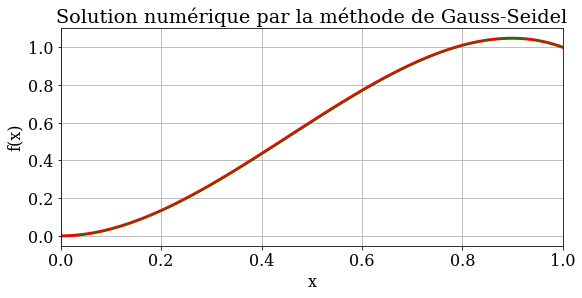

In [13]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title("Solution numérique par la méthode de Gauss-Seidel")
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.grid()   
pyplot.plot(x, f_exact, color='r', linestyle='-', linewidth=3)
pyplot.plot(x, f_gs, color='g', linestyle='-', linewidth=1)
pyplot.xlim(0,Lx);

Graphiquement, la solution numérique (en noir) concorde presque parfaitement avec la solution exacte (en rouge) (6) 

Remarque : Il est difficile d'observer les deux courbes car elles sont quasiment superposées, mais on peut vérifier qu'elles sont bien là toutes les deux en modifiant la largeur relative des traits. 


Vérifions cette observation en calculant la norme L2 relative entre la solution exacte et la solution obtenue avec l'algorithme de Gauss Seidel.

In [14]:
L2_rel_error(f_gs,f_exact)

0.0052488497362888934

Cette différence est tout à fait raisonnable. Pour finir, on peut déterminer le temps d'exécution du programme.

In [15]:
%%timeit
gauss_seidel(f0, dx, maxiter=20000, rtol=1e-8)

32.5 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 5)

Pour finir, nous allons résoudre le même problème qu'aux questions précédentes en appliquant cette fois la méthode du gradient conjugué. Nous avons déjà bien défini tous les paramètres du problème, il s'agit donc simplement d'écrire l'algorithme. Pour ce faire, nous définissons l'opérateur $A$ comme :

$$
\frac{d^4 f}{dx^4}- 5 \frac{d^2 f}{dx^2}+ 4f = 0 
$$

$$
\Leftrightarrow  A(\textbf{f})=\textbf{0}
$$

Rappelons que dans la définition de $A$, $\textbf{f}$ et $\textbf{0}$ sont des vecteurs de dimension nx et $A$ est une matrice de dimension nx. Discrétisons l'opérateur $A$ en central finite différence à l'ordre 2.

\begin{align}
A(f_i)= \frac{f_{i-2}-4f_{i-1}+6f_{i}-4f_{i+1}+f_{i+2}}{\Delta x^4}-5\frac{f_{i-1}-2f_{i}+f_{i+1}}{\Delta x^2}+4f_i
\end{align}

Nous devons à présent implémenter les conditions au bord. Celles de Dirichlet sont automatiquement respectées en ne modifiant simplement pas le premier et le dernier élement de la condition initiale. En revanche, les conditions de Von Neumann sont plus délicates à traiter. En effet, pour les nx-2 autres éléments de $f$, nous ne pouvons pas simplement implémenter $A$ comme défini ci-haut puisque cette fonction fait appel, pour le calcul de $f_1$ et $f_{nx-2}$,  aux éléments $f_{-1}$ et $f_{nx}$ qui ne sont pas définis. Pour remédier à ce problème, nous allons discrétiser les conditions de Von Neumann en central finite difference.

\begin{align}
\left\{
    \begin{array}{ll}
    \frac{f_1-f_{-1}}{2\Delta x} &= 0 \\
    \frac{f_{nx}-f_{nx-2}}{2\Delta x} &= -1
    \end{array}
\right.
\end{align}

Ce qui revient à exprimer des éléments extérieurs à la discrétisation en fonction d'éléments définis de $\textbf{f}$.

\begin{align}
\left\{
    \begin{array}{ll}
    f_{-1} &= f_1 \\
    f_{nx} &= -2\Delta x + f_{nx-2}
    \end{array}
\right. \hspace{3cm} (7)
\end{align}

On a donc finallement :

\begin{align}
\Leftrightarrow 
  &\left\{
    \begin{array}{ll}
    A(f_1)&= \frac{7f_{1}-4f_{2}+f_{3}}{\Delta x^4}-5\frac{-2f_{1}+f_{2}}{\Delta x^2}+4f_1 \\
    A(f_{nx-2})&= \frac{f_{nx-4}-4f_{nx-3}+7f_{nx-2}-4-2\Delta x}{\Delta x^4}-5\frac{f_{nx-3}-2f_{nx-2}+1}{\Delta x^2}+4f_{nx-2}
    \end{array}
\right.
\end{align}

où on a utilisé les conditions de Dirichlet $f_0=0$, $f_{nx-1}=1$ et les deux égalités (7).

Nous pouvons maintenant définir la fonction "conjugate_gradient".

In [16]:
def conjugate_gradient(f0, dx, maxiter=1000, rtol=1e-8): 
    """ Résout l'équation (1) sous les conditions au bord (4) en utilisant la méthode de relaxation de Gauss-Seidel.
    
    Le critère d'arrêt du solveur est basée sur la norme L2 relative entre deux itérations consécutives.

    Paramètres
    ----------
    f0 : numpy.ndarray
         Estimation initiale
    dx : float
         Espacement entre chaque point de la discrétisation
    maxiter :   integer, optionnel
                Nombre d'itération maximum;
                par défaut : 1000
    rtol : float, optionnel
           Tolérence relative pour la convergence;
           par défaut: 1e-8.
    Retourne :
    --------
    f : numpy.ndarray
        La solution après relaxation comme un array 1D de floats
    ite : integer
          Nombre d'itérations ayant eu lieu
    
    conv : list
           Historique de convergence sous forme d'une liste de floats    
        
    """
    def A(f):
        # Appliquer l'opérateur laplacien à p
        g=np.zeros(nx-2)
        g[1:-1]=(f[:-4]-4*f[1:-3]+6*f[2:-2]-4*f[3:-1]+f[4:])/(dx**4)-5*(f[1:-3]-2*f[2:-2]+f[3:-1])/(dx**2)+4*f[2:-2]
        g[0]= (7*f[1]-4*f[2]+f[3])/(dx**4)-5*(-2*f[1]+f[2])/(dx**2)+4*f[1]
        g[-1]= (f[nx-4]-4*f[nx-3]+7*f[nx-2]-4-2*dx)/(dx**4)-5*(f[nx-3]-2*f[nx-2]+1)/(dx**2)+4*f[nx-2]
        return g
    f = f0.copy()
    r = np.zeros(nx)  # résidu initial
    Ad = np.zeros(nx)  # Pour stocker les multiplications du vecteur d par la matrice A
    conv = []  # historique de la convergence
    diff = rtol + 1  # différence initiale
    ite = 0  # indice de l'itération
    # On calcule le résidu initial
    r[1:-1] =  - A(f)
    # On prend le résidu comme direction de recherche initiale.
    d = r.copy()
    while diff > rtol and ite < maxiter:
        fk = f.copy()
        rk = r.copy()
        # On calcule l'application de l'opérateur A à la direction d
        Ad[1:-1] = A(d)
        # On calcule la taille de l'étape
        alpha = np.sum(r * r) / np.sum(d * Ad)
        # On met à jour la solution
        f = fk + alpha * d
        # On met à jour le résidu
        r = rk - alpha * Ad
        # On met  à jour la direction de recherche
        beta = np.sum(r * r) / np.sum(rk * rk)
        d = r + beta * d
        # On calcule la norme L2 relative entre deux solutions consécutives.
        diff = L2_rel_error(f, fk)
        conv.append(diff)
        ite += 1
    return f, ite, conv

In [21]:
f_cg, ites, conv_cg = conjugate_gradient(f0, dx,maxiter=1000,rtol=1e-8)
print('Method of conjugate gradients: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv_cg[-1]))

Method of conjugate gradients: 681 iterations to reach a relative difference of 9.601399779016183e-09


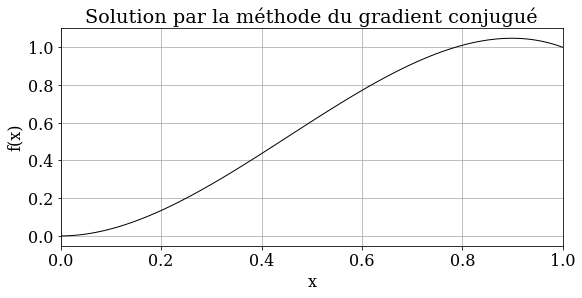

In [22]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title("Solution par la méthode du gradient conjugué")
pyplot.xlabel('x')
pyplot.ylabel('f(x)')
pyplot.grid()   
pyplot.plot(x, f_cg, color='k', linestyle='-', linewidth=1)
pyplot.xlim(0,Lx);

Graphiquement la solution semble cohérente avec la solution exacte et la solution numérique obtenue par la méthode de Gauss-Seidel.

In [23]:
L2_rel_error(f_cg,f_exact)

3.9799702122608504e-05

In [24]:
%%timeit
conjugate_gradient(f0, dx, maxiter=1000, rtol=1e-8)

50.6 ms ± 7.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


La méthode du gradient conjugué nous offre donc une solution numérique beaucoup plus précise, l'erreur relative étant 100 fois moindre. L'amélioration la plus frappante est bien sûr le nombre d'itérations nécessaires avant la convergence. Gauss-Seidel nécessite plus de 2 million et demi d'itération là où la méthode du gradient conjugué atteint le seuil en moins de 1000 itérations ! De plus, le temps d'excécution de la fonction conjugate_gradient est presque deux fois plus rapide qu'avec la méthode de Gauss-Seidel. Remarquons que ce rapport entre les deux temps de calcul dépend fortement de l'appareil et du problème auquel on applique les algorithme (en particulier à la dimension et la taille du domaine étudié).

### Remarque sur la décroissance de la différence entre itérations

Dans le module 5 du cours nous avons vu que, pour la méthode de Gauss-Seidel, la différence entre deux itérations successives décroît très rapidement au départ, puis qu'elle diminue plus lentement jusqu'à atteindre le seuil requis après un grand nombre d'itérations. Nous avions également étudié d'autre méthodes suivant un comportement siimilaire mais convergeant beaucoup plus rapidement comme la méthode "SOR". En particulier, les graphiques donnant l'évolution de la norme relative L2 de la différence semblent toujours "lisses". Il serait intéressant de regarder le graphique de l'évolution de la norme L2 pour nos deux fonctions "gauss_seidel" et "conjugate_gradient".

/Users/lmbenizri/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


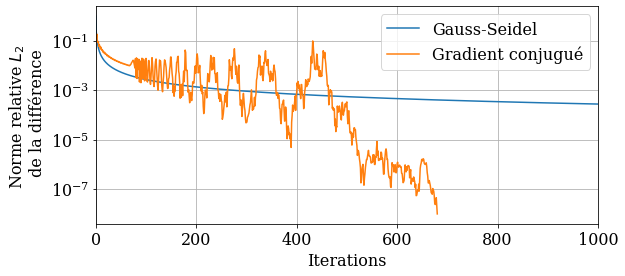

In [25]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.xlabel('Iterations')
pyplot.ylabel("Norme relative $L_2$ \n de la différence")
pyplot.grid()
pyplot.semilogy(conv_gs, label='Gauss-Seidel')
pyplot.semilogy(conv_cg, label='Gradient conjugué')
pyplot.legend()
pyplot.xlim(0, 1000);

Bien sûr, nous ne pouvons pas afficher toute la courbe pour la méthode de Gauss-Seidel puisqu'elle n'atteint son but qu'après 2 609 892 itérations alors que la courbe du gradient conjugué l'atteint après seulement 681 itérations. Comme attendu, la première courbe est assez lisse, décroit très rapidement lors des premières itérations puis diminue lentement jusqu'au seuil. Le graphique correspondant à la méthode du gradient conjugué est plus étonnant. La norme relative diminue d'abord moins rapidement que Gauss-Seidel. Puis, après environ une centaine d'itérations, elle commence à osciller autour de cette première courbe (de façon saccadée). L'amplitude de ces oscillations s'accroît (et les minima associés sont donc de plus en plus bas). Après environ 500 itérations, le graphe cesse d'osciller autour de la courbe de Gauss-Seidel et continue sa descente irrégulière jusqu'à atteindre le seuil de $10^{-8}$ après seulement 200 itérations supplémentaires.